### Analysis of OxDNA simulations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [59]:
local_path="5E7_steps"
ext_path="/home/fmambretti@iit.local/Documents/oxdna_ns/single_linker/"
Temps=(10,20,30,40,50,60,62,64,66,68,70,72,74,76,78,80)
norm=26 #max formed bonds
nreplicas=4

In [17]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [58]:
'''def extrapolate_bulk(fraction):
    phi=fraction/(1-fraction)
    if phi==0:
        return 0
    else:
        x=1+1/(2*phi)
        return  x-np.sqrt(np.fabs(x*x-1))
'''

'def extrapolate_bulk(fraction):\n    phi=fraction/(1-fraction)\n    if phi==0:\n        return 0\n    else:\n        x=1+1/(2*phi)\n        return  x-np.sqrt(np.fabs(x*x-1))\n'

In [57]:
def extrapolate_bulk_array(array_fraction):
    x=np.zeros(len(array_fraction))
    y=np.zeros(len(array_fraction))
    for i,fraction in enumerate(array_fraction): #TO BE COMPLETED
        if fraction==1:
            x[i]=1
            y[i]=1
        else:
            phi=fraction/(1-fraction)
            if phi==0:
                y[i]=0
            else:
                x[i]=1+1/(2*phi)
                y[i]=x[i]-np.sqrt(np.fabs(x[i]*x[i]-1))
    return  y 

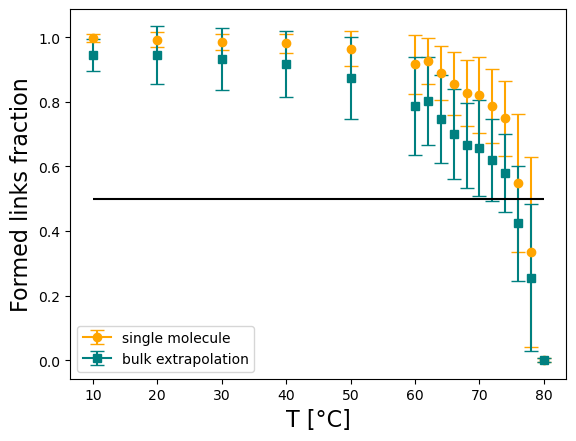

In [60]:
skip=10000
ndata=50001-skip
for T in Temps:
    #load from replicas
    ave_data=np.zeros(ndata)
    bulk_data=np.zeros(ndata)
    ave_bulk_data=np.zeros(ndata)
    norm_data=np.zeros(len(ave_data))
    for r in range (1,5):
        data=np.loadtxt(local_path+"/replica"+str(r)+"/T_"+str(T)+"/hb_count.dat",unpack=True,skiprows=skip)
        ave_data+=data
        norm_data=data/norm #transform counts into fractions
        bulk_data=extrapolate_bulk_array(norm_data)
        ave_bulk_data+=bulk_data
    ave_data/=(norm*nreplicas)
    ave_bulk_data/=(nreplicas)
    mymean=np.mean(ave_data)
    mystd=np.std(ave_data)
    mybulkmean=np.mean(ave_bulk_data)
    mybulkstd=np.std(ave_bulk_data)
    if T==10:
        plt.errorbar(T,mymean,yerr=mystd,marker='o',color='orange',capsize=5,label='single molecule')
        plt.errorbar(T,mybulkmean,yerr=mybulkstd,marker='s',color='teal',capsize=5,label='bulk extrapolation')

    else:
        plt.errorbar(T,mymean,yerr=2*mystd,marker='o',color='orange',capsize=5)
        plt.errorbar(T,mybulkmean,yerr=2*mybulkstd,marker='s',color='teal',capsize=5)
    plt.ylabel("Formed links fraction",fontsize=16)
    plt.xlabel("T [°C]",fontsize=16)
plt.hlines(0.5,10,80,color='black')
plt.legend()
plt.show()